## RNN analysis of all categories (angle + duration)

In [1]:
import os
import sys
import importlib
import seaborn as sns
import numpy as np
import random
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.decomposition import PCA
from collections import defaultdict
import math
import pylab

# pyaldata
sys.path.append("/home/zms24/Desktop") 
import PyalData.pyaldata as pyal # type:ignore

# tools functions
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from tools.curbd import curbd
from tools.dsp.preprocessing import preprocess
from tools.rnn_and_curbd import rnn as rnnz
from tools.rnn_and_curbd import plotting as pltz
from tools.rnn_and_curbd import model_analysis as analyz
from tools.rnn_and_curbd import curbd as curbdz

# Reload modules
importlib.reload(rnnz)
importlib.reload(pltz)
importlib.reload(analyz)
importlib.reload(curbdz)

np.random.seed(61)

In [2]:
fname0 = 'rnn2_model_M062_2025_03_19_14_00.mat'
path0 = os.path.join("/home/zms24/Desktop/rnn_models/", fname0)

data0 = loadmat(path0, simplify_cells=True)
rnn_model0 = data0['rnn_model']

pyal_dict0 = rnnz.process_pyal_M061_M062_files(fname0, rnn_model0)

array field all_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
field values_Sol_direction could not be converted to int.
field idx_Sol_direction could not be converted to int.
field values_Sol_duration could not be converted to int.
field idx_Sol_duration could not be converted to int.
field idx_sol_on could not be converted to int.
array field all_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field all_KSLabel could not be converted to i

/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_X might be a time-varying field. It matches the length of VAL_spikes on 99.86149584487535% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_X might be a time-varying field. It matches the length of VAL_spikes on 99.86149584487535% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_Y might be a time-varying field. It matches the length of VAL_spikes on 99.86149584487535% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_Y might be a time-varying field. It matches the length of VAL_spikes on 99.86149584487535% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108

Combined every 3 bins
Resulting VAL_spikes ephys data shape is (NxT): (198, 200)
Resulting SSp_spikes ephys data shape is (NxT): (95, 200)
Resulting CP_spikes ephys data shape is (NxT): (307, 200)
Resulting MOp_spikes ephys data shape is (NxT): (210, 200)
Trial length: 200


# Model accuracy

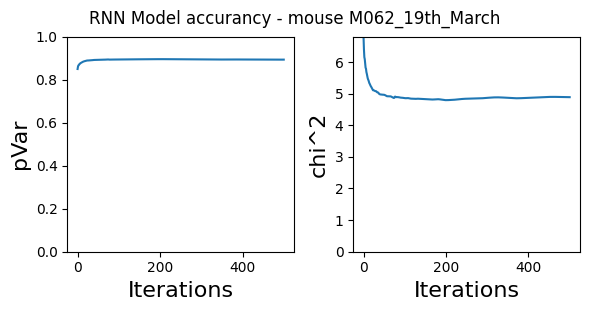

In [3]:
accuracy_fig = pltz.plot_model_accuracy(rnn_model0, "M062_19th_March")

# CURBD

In [4]:
BIN_SIZE =  rnn_model0['dtData']

In [5]:
import matplotlib.colors as mcolors

def blend_colors(source_hex, target_hex, source_weight=0.6):
    """Blend two hex colors, source-dominant."""
    source_rgb = mcolors.to_rgb(source_hex)
    target_rgb = mcolors.to_rgb(target_hex)

    blended_rgb = tuple(
        source_weight * s + (1 - source_weight) * t
        for s, t in zip(source_rgb, target_rgb)
    )
    return mcolors.to_hex(blended_rgb)

def generate_directional_colors(area_colors, source_weight=0.6):
    curbd_colors = {}
    areas = [k for k in area_colors if k != 'all']  # exclude 'all'

    for source in areas:
        for target in areas:
            key = f'{source} to {target}'
            source_color = area_colors[source]
            target_color = area_colors[target]
            blended = blend_colors(source_color, target_color, source_weight)
            curbd_colors[key] = blended

    return curbd_colors

In [6]:
brain_area_colors = {
    'MOp': "#3681D2",
    'SSp': "#ff9d4d",
    'CP': "#8ed74d",
    'VAL': '#e76f51',
    'all': '#bbbbbb'
}

curbd_colors = generate_directional_colors(brain_area_colors)

## 19th March session

In [7]:
curbd_arr0, curbd_labels0 = curbd.computeCURBD(rnn_model0)
n_regions0 = curbd_arr0.shape[0]
currents0, current_labels0 = curbdz.format_curbd_output(curbd_arr0, curbd_labels0, n_regions0, pyal_dict0['reset_points'])

In [8]:
currents0[10].shape

(307, 48, 400)

In [9]:
print(pyal_dict0['reset_points'])

[0, 400, 800, 1200, 1600, 2000, 2400, 2800, 3200, 3600, 4000, 4400, 4800, 5200, 5600, 6000, 6400, 6800, 7200, 7600, 8000, 8400, 8800, 9200, 9600, 10000, 10400, 10800, 11200, 11600, 12000, 12400, 12800, 13200, 13600, 14000, 14400, 14800, 15200, 15600, 16000, 16400, 16800, 17200, 17600, 18000, 18400, 18800, 19200, 19600, 20000, 20400, 20800, 21200, 21600, 22000, 22400, 22800, 23200, 23600, 24000, 24400, 24800, 25200, 25600, 26000, 26400, 26800, 27200, 27600, 28000, 28400, 28800, 29200, 29600, 30000, 30400, 30800, 31200, 31600, 32000, 32400, 32800, 33200, 33600, 34000, 34400, 34800, 35200, 35600, 36000, 36400, 36800, 37200, 37600, 38000, 38400, 38800, 39200, 39600, 40000, 40400, 40800, 41200, 41600, 42000, 42400, 42800, 43200, 43600, 44000, 44400, 44800, 45200, 45600, 46000, 46400, 46800, 47200, 47600, 48000, 48400, 48800, 49200, 49600, 50000, 50400, 50800, 51200, 51600, 52000, 52400, 52800, 53200, 53600, 54000, 54400, 54800, 55200, 55600, 56000, 56400, 56800, 57200, 57600, 58000, 58400, 

In [10]:
curbd_arr0[0][0].shape

(210, 19199)

In [11]:
def plot_currents_by_region(all_currents, all_currents_labels, perturbation_time, curbd_colours, bin_size, dtFactor, mouse_num):
    n = len(all_currents)
    n_regions = int(math.sqrt(n))
    assert n_regions ** 2 == n, "Number of plots must be a perfect square"

    fig, axes = plt.subplots(n_regions, n_regions, figsize=(10, 8), sharex=True)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    global_min, global_max = float('inf'), float('-inf')
    mean_sem_data = []

    # First pass: compute global y-limits
    for current_data in all_currents:
        current_data = np.array(current_data)
        mean_current = np.mean(current_data, axis=(0, 1))
        sem_current = np.std(current_data, axis=(0, 1)) / np.sqrt(current_data.shape[0] * current_data.shape[1])

        y_lower = np.min(mean_current - sem_current)
        y_upper = np.max(mean_current + sem_current)

        global_min = min(global_min, y_lower)
        global_max = max(global_max, y_upper)

        mean_sem_data.append((mean_current, sem_current))

    # Second pass: plot each
    for i in range(n):
        row, col = divmod(i, n_regions)
        ax = axes[row, col]

        current_label = all_currents_labels[i]
        colour = curbd_colours.get(current_label, f'C{i % 10}')

        current_data = np.array(all_currents[i])
        mean_current, sem_current = mean_sem_data[i]
        time_axis = np.linspace(0, (current_data.shape[2] * bin_size) / dtFactor, current_data.shape[2])

        ax.plot(time_axis, mean_current, linewidth=2, color=colour)
        ax.fill_between(time_axis, mean_current - sem_current, mean_current + sem_current, alpha=0.3, color=colour)
        ax.axvline(perturbation_time, color='red', linestyle='--', linewidth=1)

        ax.set_title(current_label, fontsize='large')

        # Only label outer plots
        if row == n_regions - 1:
            ax.set_xlabel('Time (s)', fontsize='large')
        if col == 0:
            ax.set_ylabel('Current Strength', fontsize='large')

        # ax.set_ylim(global_min, global_max)

    fig.suptitle(f'Average current across all trials - Session {mouse_num}', fontsize='x-large')
    fig.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

    return fig

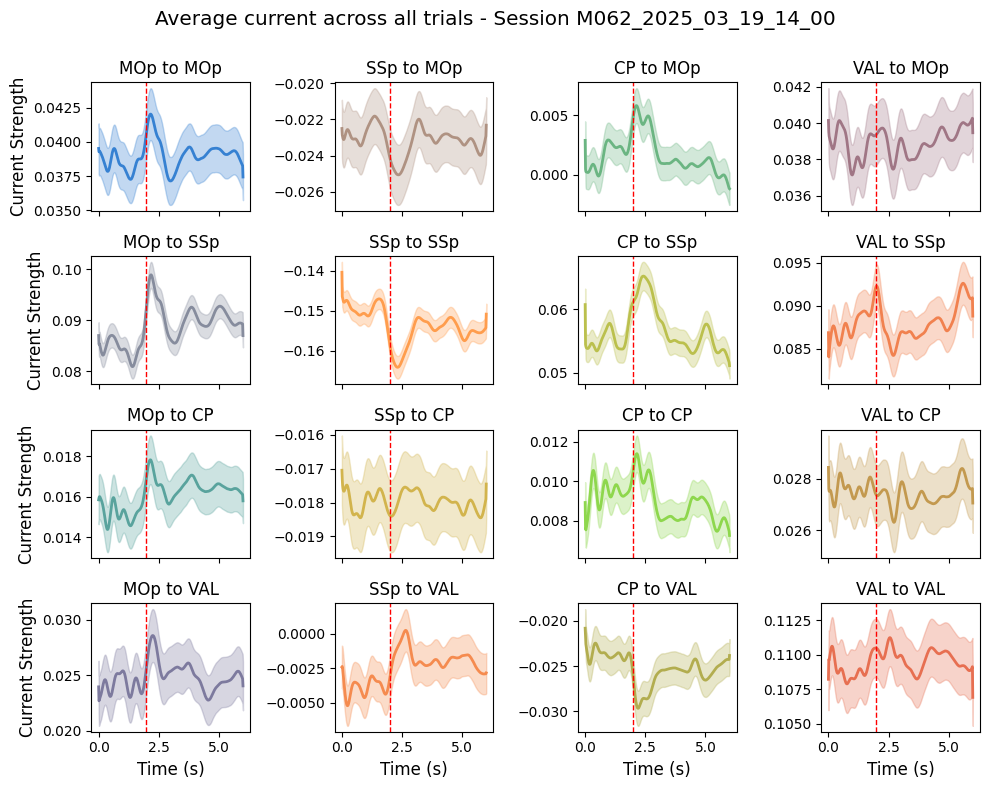

In [12]:
currents_fig = plot_currents_by_region(currents0, current_labels0, pyal_dict0['perturbation_time_sec'], curbd_colors, BIN_SIZE, rnn_model0['params']['dtFactor'], 'M062_2025_03_19_14_00')

## For each duration

In [13]:
category_labels = rnn_model0['categories']
print(category_labels)

['0_50  ' '0_100 ' '0_150 ' '0_200 ' '1_50  ' '1_100 ' '1_150 ' '1_200 '
 '2_50  ' '2_100 ' '2_150 ' '2_200 ' '3_50  ' '3_100 ' '3_150 ' '3_200 '
 '4_50  ' '4_100 ' '4_150 ' '4_200 ' '5_50  ' '5_100 ' '5_150 ' '5_200 '
 '6_50  ' '6_100 ' '6_150 ' '6_200 ' '7_50  ' '7_100 ' '7_150 ' '7_200 '
 '8_50  ' '8_100 ' '8_150 ' '8_200 ' '9_50  ' '9_100 ' '9_150 ' '9_200 '
 '10_50 ' '10_100' '10_150' '10_200' '11_50 ' '11_100' '11_150' '11_200']


In [14]:
duration_indices = defaultdict(list)

for idx, label in enumerate(category_labels):
    label = label.strip()              # Remove extra spaces
    angle, duration = label.split('_') # Split into angle and duration
    duration_indices[duration].append(idx)

# Result: a dictionary where keys are durations and values are indices
for duration, indices in duration_indices.items():
    print(f"Duration {duration}: indices {indices}")

Duration 50: indices [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44]
Duration 100: indices [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45]
Duration 150: indices [2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46]
Duration 200: indices [3, 7, 11, 15, 19, 23, 27, 31, 35, 39, 43, 47]


In [15]:
selected_trials = currents0[0][:, duration_indices[duration], :]

In [16]:
def plot_currents_by_region_by_duration(
    all_currents,                 # list of shape (n_regions,) each with (n_trials, n_channels, n_timepoints)
    all_currents_labels,         # list of region labels (same length as all_currents)
    perturbation_time,           # time (in seconds) to plot the vertical line
    duration_indices,            # dict mapping duration strings like '50' to list of trial indices
    duration_colours,            # dict mapping duration strings to colors
    bin_size, dtFactor,          # for calculating the time axis
    mouse_num
):
    import matplotlib.pyplot as plt
    import numpy as np
    import math

    n = len(all_currents)
    n_regions = int(math.sqrt(n))
    assert n_regions ** 2 == n, "Number of plots must be a perfect square"

    fig, axes = plt.subplots(n_regions, n_regions, figsize=(12, 10), sharex=True)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    global_min, global_max = float('inf'), float('-inf')

    for i in range(n):
        row, col = divmod(i, n_regions)
        ax = axes[row, col]
        region_data = np.array(all_currents[i])  # shape: (n_trials, n_channels, n_timepoints)
        current_label = all_currents_labels[i]

        # Plot mean and SEM per duration
        for duration, indices in duration_indices.items():
            if len(indices) == 0:
                continue

            trials = region_data[indices, :, :]  # shape: (n_sel_trials, n_channels, n_timepoints)
            mean_current = np.mean(trials, axis=(0, 1))
            sem_current = np.std(trials, axis=(0, 1)) / np.sqrt(trials.shape[0] * trials.shape[1])

            y_lower = np.min(mean_current - sem_current)
            y_upper = np.max(mean_current + sem_current)
            global_min = min(global_min, y_lower)
            global_max = max(global_max, y_upper)

            colour = duration_colours.get(duration, f'C{int(duration) % 10}')
            time_axis = np.linspace(0, (trials.shape[2] * bin_size) / dtFactor, trials.shape[2])

            ax.plot(time_axis, mean_current, label=f'Dur {duration}', linewidth=2, color=colour)
            ax.fill_between(time_axis, mean_current - sem_current, mean_current + sem_current, alpha=0.2, color=colour)

        ax.axvline(perturbation_time, color='red', linestyle='--', linewidth=1)
        ax.set_title(current_label, fontsize='large')

        if row == n_regions - 1:
            ax.set_xlabel('Time (s)', fontsize='large')
        if col == 0:
            ax.set_ylabel('Current Strength', fontsize='large')

    # Shared legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=len(duration_indices), fontsize='medium',  bbox_to_anchor=(0.5, 0.95),)

    fig.suptitle(f'Current by Duration - Session {mouse_num}', fontsize='x-large')
    # fig.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    return fig

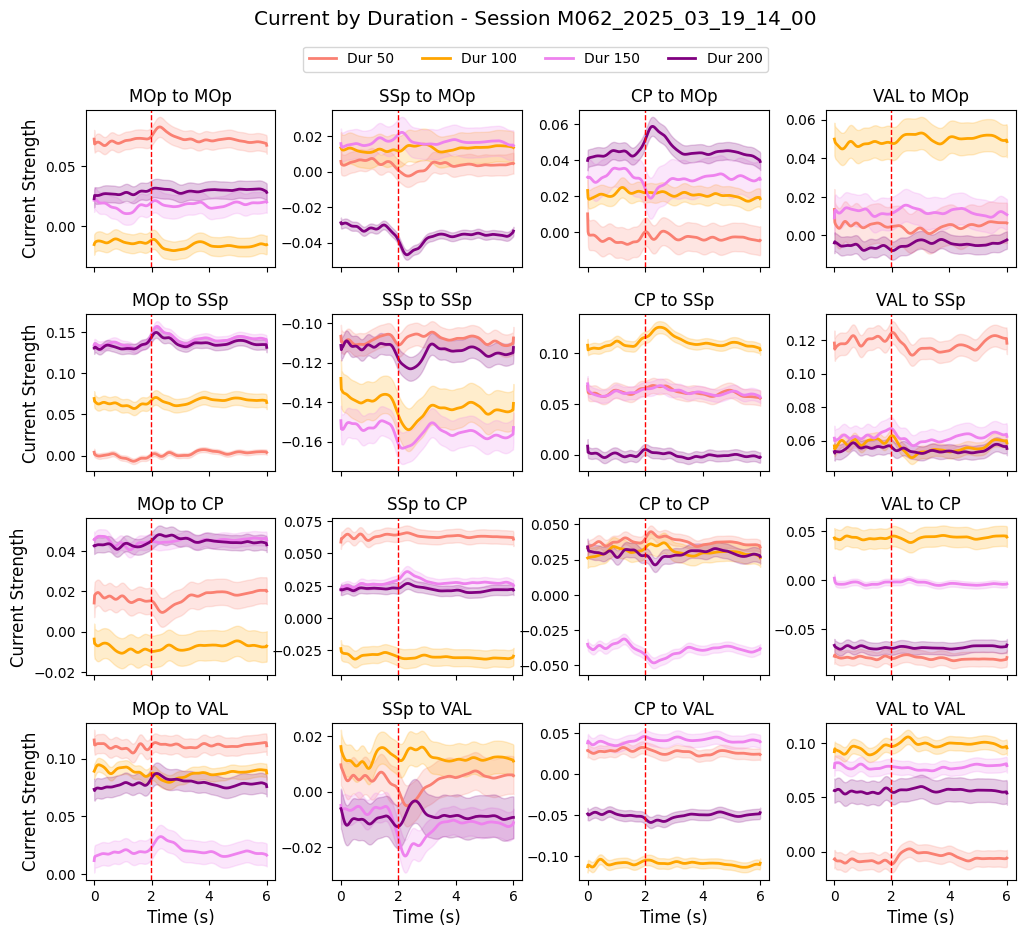

In [17]:
duration_colours = {
    '50': 'salmon',
    '100': 'orange',
    '150': 'violet',
    '200': 'purple'
}

duration_curr = plot_currents_by_region_by_duration(
    all_currents=currents0,
    all_currents_labels=current_labels0,
    perturbation_time=pyal_dict0['perturbation_time_sec'],
    duration_indices=duration_indices,
    duration_colours=duration_colours,
    bin_size=BIN_SIZE,
    dtFactor=rnn_model0['params']['dtFactor'],
    mouse_num='M062_2025_03_19_14_00'
)

## By angle

In [18]:
# Solenoid-to-physical-angle mapping
solenoid_angles = {
    0: 60, 1: 120, 2: 240, 3: 300,
    4: 0, 5: 60, 6: 120, 7: 180,
    8: 240, 9: 300, 10: 0, 11: 180
}

# Create the new angle-based indices (pointing into the original labels array)
angle_indices = defaultdict(list)

for idx, label in enumerate(category_labels):
    label = label.strip()
    solenoid_idx, _ = label.split('_')
    solenoid_idx = int(solenoid_idx)

    angle = solenoid_angles[solenoid_idx]
    angle_indices[angle].append(idx)

In [19]:
angle_colours = {
    0: 'navy',
    60: 'blue',
    120: 'royalblue',
    180: 'deepskyblue',
    240: 'skyblue',
    300: 'darkturquoise'
}

In [20]:
def plot_currents_by_region_by_angle(
    all_currents,
    all_currents_labels,
    perturbation_time,
    angle_indices,         # angle-based trial groupings
    angle_colours,         # colormap for angles
    bin_size, dtFactor,
    mouse_num
):
    import matplotlib.pyplot as plt
    import numpy as np
    import math

    n = len(all_currents)
    n_regions = int(math.sqrt(n))
    assert n_regions ** 2 == n, "Number of plots must be a perfect square"

    fig, axes = plt.subplots(n_regions, n_regions, figsize=(12, 10), sharex=True)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    global_min, global_max = float('inf'), float('-inf')

    for i in range(n):
        row, col = divmod(i, n_regions)
        ax = axes[row, col]
        region_data = np.array(all_currents[i])  # (trials, channels, timepoints)
        region_label = all_currents_labels[i]

        for angle, indices in angle_indices.items():
            if len(indices) == 0:
                continue

            trials = region_data[indices, :, :]
            mean_current = np.mean(trials, axis=(0, 1))
            sem_current = np.std(trials, axis=(0, 1)) / np.sqrt(trials.shape[0] * trials.shape[1])

            y_lower = np.min(mean_current - sem_current)
            y_upper = np.max(mean_current + sem_current)
            global_min = min(global_min, y_lower)
            global_max = max(global_max, y_upper)

            colour = angle_colours.get(angle, f'C{int(angle) % 10}')
            time_axis = np.linspace(0, (trials.shape[2] * bin_size) / dtFactor, trials.shape[2])

            ax.plot(time_axis, mean_current, label=f'Angle {angle}', linewidth=2, color=colour)
            ax.fill_between(time_axis, mean_current - sem_current, mean_current + sem_current, alpha=0.2, color=colour)

        ax.axvline(perturbation_time, color='red', linestyle='--', linewidth=1)
        ax.set_title(region_label, fontsize='large')

        if row == n_regions - 1:
            ax.set_xlabel('Time (s)', fontsize='large')
        if col == 0:
            ax.set_ylabel('Current Strength', fontsize='large')

    handles, labels = ax.get_legend_handles_labels()

    # Pair up labels and handles
    label_handle_pairs = list(zip(labels, handles))

    # Sort by numeric angle extracted from the label string, e.g. "Angle 60" -> 60
    label_handle_pairs.sort(key=lambda x: int(x[0].split()[-1]))

    # Unzip sorted pairs
    sorted_labels, sorted_handles = zip(*label_handle_pairs)

    fig.legend(sorted_handles, sorted_labels, loc='upper center', bbox_to_anchor=(0.5, 1.02),
            ncol=min(len(angle_indices), 6), fontsize='medium')

    fig.suptitle(f'Current by Solenoid Angle - Session {mouse_num}', fontsize='x-large')
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    return fig

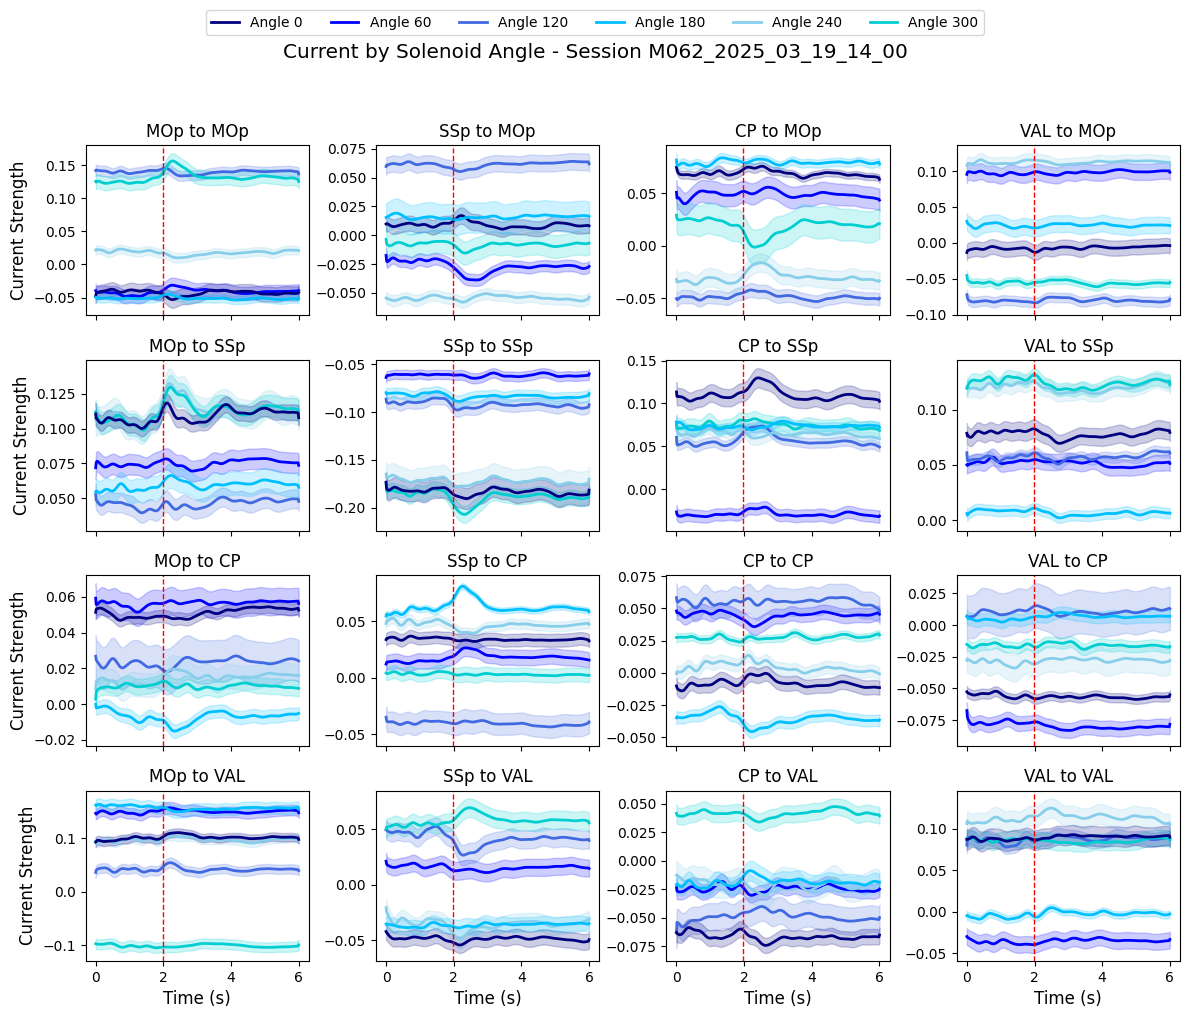

In [21]:
angle_curr = plot_currents_by_region_by_angle(
    all_currents=currents0,
    all_currents_labels=current_labels0,
    perturbation_time=pyal_dict0['perturbation_time_sec'],
    angle_indices=angle_indices,
    angle_colours=angle_colours,
    bin_size=BIN_SIZE,
    dtFactor=rnn_model0['params']['dtFactor'],
    mouse_num='M062_2025_03_19_14_00'
)

# Classifier

In [289]:
num_currents = len(currents0)
num_trials = currents0[0].shape[1]  # trials dimension
solenoid_angles = {
    0: 60, 1: 120, 2: 240, 3: 300,
    4: 0, 5: 60, 6: 120, 7: 180,
    8: 240, 9: 300, 10: 0, 11: 180
}

# Parse sol_angle and sol_duration per trial label
sol_angles = []
sol_durations = []
for lab in category_labels:
    lab = lab.strip()
    angle_str, dur_str = lab.split('_')
    sol_angles.append(int(angle_str))
    sol_durations.append(int(dur_str))

# Build rows of data — each row is a dict with angle, duration, and arrays per current
rows = []
for trial_idx in range(num_trials):
    row = {
        'sol_idx': sol_angles[trial_idx],
        'sol_angle': solenoid_angles[sol_angles[trial_idx]],
        'sol_duration': sol_durations[trial_idx],
    }
    for i in range(num_currents):
        label = current_labels0[i].strip() + '_rates'  # ✅ Append "_rates"
        trial_data = currents0[i][:, trial_idx, :]  # shape (neurons, time)
        row[label] = trial_data
    rows.append(row)

# Create DataFrame
df_ = pd.DataFrame(rows)

In [290]:
df_['MOp to MOp_rates'][0].shape

(210, 400)

In [292]:
df_.head(10)

,sol_idx,sol_angle,sol_duration,MOp to MOp_rates,SSp to MOp_rates,CP to MOp_rates,VAL to MOp_rates,MOp to SSp_rates,SSp to SSp_rates,CP to SSp_rates,VAL to SSp_rates,MOp to CP_rates,SSp to CP_rates,CP to CP_rates,VAL to CP_rates,MOp to VAL_rates,SSp to VAL_rates,CP to VAL_rates,VAL to VAL_rates
0,0,60,50,"[[-0.1500136493530877, -0.1500136493530877, -0...","[[-0.20202525776085703, -0.20202525776085703, ...","[[0.19049518450377723, 0.19049518450377723, 0....","[[0.13888959030846612, 0.13888959030846612, 0....","[[0.008321673652148873, 0.008321673652148873, ...","[[-0.006532136394058244, -0.006532136394058244...","[[-0.3318837541167071, -0.3318837541167071, -0...","[[0.3524970501385002, 0.3524970501385002, 0.35...","[[0.22193138619690891, 0.22193138619690891, 0....","[[0.036432410776549205, 0.036432410776549205, ...","[[-0.08028746900086334, -0.08028746900086334, ...","[[-0.15185179076250852, -0.15185179076250852, ...","[[-0.03336599028421683, -0.03336599028421683, ...","[[0.00025649865547732777, 0.000256498655477327...","[[0.021297900726655314, 0.021297900726655314, ...","[[0.011662473305786056, 0.011662473305786056, ..."
1,0,60,100,"[[-0.1332990681564997, -0.10375446198935531, -...","[[-0.16334245280005802, -0.14082199921897873, ...","[[0.07426364424900733, 0.11738704528486066, 0....","[[0.09575049745480022, 0.11011171863736596, 0....","[[-0.1771050704051761, -0.12657732213289521, -...","[[0.09778690760572531, 0.07694952731346956, 0....","[[-0.14308217072222093, -0.18517846989848574, ...","[[0.19835990318614974, 0.21891079157653393, 0....","[[0.2080614924823999, 0.21806108335846094, 0.2...","[[0.011962912160937226, -0.0047959365936132295...","[[-0.09115332382104951, -0.07666512950518714, ...","[[-0.11554909068394681, -0.12419939954630962, ...","[[-0.008796786276539808, -0.007767091503116596...","[[0.04345425571724136, 0.044465947381769996, 0...","[[-0.04709778706165217, -0.05539602979316308, ...","[[0.05214595892292708, 0.04083097232388119, 0...."
2,0,60,150,"[[-0.12530509271092713, -0.12014628553530515, ...","[[-0.14327185703462772, -0.1789367387498604, -...","[[0.2041595025384469, 0.16215518805365187, 0.1...","[[0.18406496123604105, 0.1720381225203042, 0.1...","[[0.12051609082399302, 0.07717740494869345, 0....","[[0.0010261410838084467, 0.03260259747214475, ...","[[-0.26379329120575834, -0.3089675576279235, -...","[[0.2893369564761793, 0.2744766186724668, 0.29...","[[0.2994408788256183, 0.27760377148807147, 0.2...","[[0.02309737474594322, 0.010951215682619758, 0...","[[-0.14967620741387527, -0.1092885822202206, -...","[[-0.16306869495075815, -0.1791255675303744, -...","[[-0.009775465606430191, -0.024790928624722715...","[[0.009686284230861453, 0.009295335900375793, ...","[[-0.03216647843154885, -0.009831987016009788,...","[[0.07754440745197623, 0.04028823759453565, 0...."
3,0,60,200,"[[-0.11676454486882411, -0.08150842358369559, ...","[[-0.223031038431469, -0.22515433583573002, -0...","[[0.179860584992384, 0.23371385115964866, 0.22...","[[-0.027319241002722316, 0.11697034303277715, ...","[[-0.12490047940544555, 0.01425816453747687, 0...","[[0.0018064786360420515, 0.11224089156124249, ...","[[-0.5996837121074984, -0.41467786969904047, -...","[[0.25806586548220317, 0.4174491770085903, 0.4...","[[0.1627634797273373, 0.1733528896707298, 0.19...","[[0.0006808863111619361, 0.03332997031272042, ...","[[0.0006202392898122539, -0.03732375510294511,...","[[-0.2023512176287779, -0.20050553417104225, -...","[[0.028030655823748175, 0.020928750041166372, ...","[[0.00269444615433072, -0.006218296555165359, ...","[[-0.0053934796137949225, -0.02180657830709566...","[[0.012648248291128865, 0.010819935468189575, ..."
4,1,120,50,"[[-0.12133357555373082, -0.06201302814077864, ...","[[-0.23715705649244137, -0.22268344246880112, ...","[[0.07896335460386034, 0.06869130448715452, 0....","[[0.24638324047973223, 0.284809336443227, 0.27...","[[-0.1026758139449493, -0.04066651257896226, -...","[[0.060274882700773864, 0.10137865048802894, 0...","[[-0.3837

#### imports for PCA and classifier

In [123]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

In [269]:
def restrict_time_interval(df, brain_areas, bin_start, length):
    interval_df = df.copy()
    interval_df[brain_areas] = df[brain_areas].apply(lambda row: row.apply(lambda arr: arr[bin_start:bin_start+length, :]))
    interval_df['trial_length'] = length
    return interval_df

def concat_and_pca(df, brain_areas):
    # concat trials
    concat_data = []
    for area in brain_areas:
        data = pyal.concat_trials(df, area)
        concat_data.append(data)

    # pca and reverse concat
    n_dim = 50
    reverse_concat_data = []
    for data in concat_data:
        pca = PCA(n_components = n_dim)
        pc_data = pca.fit_transform(data)
        reverse_data = pyal.reverse_concat(pc_data, df)
        reverse_concat_data.append(reverse_data)

    return reverse_concat_data

def label_data(df, pca_data, categories):
    labeled_data = []
    for data in pca_data:
        data_dict = {cat:[] for cat in categories}
        for cat in categories:
            for index, row in df.iterrows():
                if df.sol_angle[index] == cat:
                    data_dict[cat].append(data[index]) 
        labeled_data.append(data_dict)

    return labeled_data

def pre_decoder_processing(labeled_data, categories):
    reshaped_data = []
    for X_data in labeled_data:
        # shuffle within each category
        data_X = shuffle_data(X_data, categories)
        # get minimum sample
        min_samples = minimum_samples(data_X, categories)
        # chop to minimum samples and concat for X and y data
        X_balanced_reshaped, y_balanced_reshaped = balance_and_reshape(data_X, categories, min_samples)
        # return lists ready for train-test split
        reshaped_data.append([X_balanced_reshaped, y_balanced_reshaped])
        
    return reshaped_data

def shuffle_data(df, categories):
    for cat in categories:
        random.shuffle(df[cat])
    return df

def minimum_samples(df, categories):
    min_samples = min(len(df[cat]) for cat in categories)
    return min_samples

def balance_and_reshape(X_data, categories, min_samples):
    # chop to min_sample size and combine
    X_balanced = []
    y_balanced = []
    for cat in categories:
        X_balanced.append(X_data[cat][0:min_samples])
        y_balanced.append(np.full(min_samples, cat))

    # concatenate all together
    X_balanced = np.concatenate(X_balanced, axis=0)
    y_balanced = np.concatenate(y_balanced, axis=0)

    # convert to 2d array (needed for the NB classifier)
    X_balanced_reshaped = np.array(X_balanced.reshape(len(X_balanced), -1))
    y_balanced_reshaped = np.array(y_balanced.reshape(len(y_balanced), -1))

    return [X_balanced_reshaped, y_balanced_reshaped]

def decode_and_score(clf, X_balanced_reshaped, y_balanced_reshaped, test_size, k_splits):
    X_train, X_test, y_train, y_test = train_test_split(X_balanced_reshaped, y_balanced_reshaped, test_size=test_size, random_state=0)
    # train classifier
    clf.fit(X_train, y_train.ravel())
    # make predictions
    predictions_control = clf.predict(X_train)
    predictions = clf.predict(X_test)
    # print("predictions :", predictions)
    # print("correct answers: ", y_test)
    # print("train predictions: ", predictions_control)
    # print("train correct answrrs: ", y_train)
    # calculate accuracy
    accuracy_control = accuracy_score(y_train, predictions_control)
    print(f"Control accuracy score on training data: {accuracy_control}")
    accuracy = accuracy_score(y_test, predictions)
    print(f"Test set ({test_size*100}% of data) accuracy: {accuracy}")
    # k-fold validation
    kf = KFold(n_splits=k_splits, shuffle=True, random_state=44)
    # Perform k-fold cross-validation
    scores = cross_val_score(clf, X_balanced_reshaped, y_balanced_reshaped.ravel(), cv=kf)
    # print(f"Mean k-fold score: {np.mean(scores)}")
    return clf, scores

def classify(reshaped_data, test_size, k_splits):
    scores = []
    for data in reshaped_data:
        X_data, y_data = data

        clf = GaussianNB()
        clf, score = decode_and_score(clf, X_data, y_data, test_size, k_splits)
        scores.append(score)
    return scores

In [318]:
def naive_bayes_classifier(data, start_time, length):
    df_interval = restrict_time_interval(data['data'], data['brain_areas'], start_time, length)
    pca_data = concat_and_pca(df_interval, data['brain_areas'])

    labeled_data = label_data(df_interval, pca_data, data['categories'])

    reshaped = pre_decoder_processing(labeled_data, data['categories'])

    classifier_scores = classify(reshaped, test_size = 0.25, k_splits = 3)

    return classifier_scores

In [325]:
current_names = [col for col in df_.columns if col.endswith('_rates')]
categories = df_.sol_angle.unique()

m062_dict = {'data': df_,
            'brain_areas': current_names,
                 'session_id': 'M062_19th_March',
                 'mouse': 'M062',
                 'bin_size': BIN_SIZE,
                 'perturb_time_idx': pyal_dict0['perturbation_time'],
                 'categories': categories
                 }

window_length = 20
time_offset = 4

In [329]:
m062_scores = naive_bayes_classifier(m062_dict, pyal_dict0['perturbation_time']+time_offset, window_length)

Control accuracy score on training data: 1.0
Test set (25.0% of data) accuracy: 0.16666666666666666
Control accuracy score on training data: 1.0
Test set (25.0% of data) accuracy: 0.0
Control accuracy score on training data: 1.0
Test set (25.0% of data) accuracy: 0.08333333333333333
Control accuracy score on training data: 1.0
Test set (25.0% of data) accuracy: 0.08333333333333333
Control accuracy score on training data: 1.0
Test set (25.0% of data) accuracy: 0.08333333333333333
Control accuracy score on training data: 1.0
Test set (25.0% of data) accuracy: 0.0
Control accuracy score on training data: 1.0
Test set (25.0% of data) accuracy: 0.0
Control accuracy score on training data: 1.0
Test set (25.0% of data) accuracy: 0.0
Control accuracy score on training data: 1.0
Test set (25.0% of data) accuracy: 0.08333333333333333
Control accuracy score on training data: 1.0
Test set (25.0% of data) accuracy: 0.08333333333333333
Control accuracy score on training data: 1.0
Test set (25.0% of 

In [330]:
# Step 1: Compute mean of each array inside m062_scores
mean_scores = [np.mean(score_array) for score_array in m062_scores]

# Step 2: Create DataFrame with current names
score_df = pd.DataFrame({
    'current_name': current_names,
    'mean_score': mean_scores
})

# Step 3: Group by current name and average across duplicates
summary_df = score_df.groupby('current_name', as_index=False)['mean_score'].mean()

# Optional: sort by score
summary_df = summary_df.sort_values(by='mean_score', ascending=False)

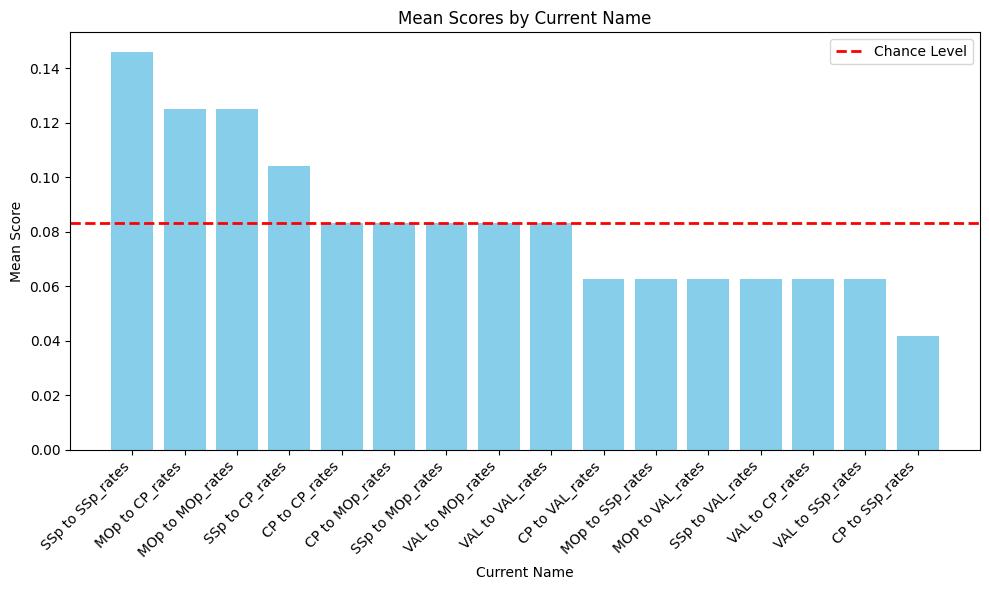

In [331]:
chance_level = 1 / 12  # ≈0.0833

plt.figure(figsize=(10, 6))
plt.bar(summary_df['current_name'], summary_df['mean_score'], color='skyblue')
plt.axhline(y=chance_level, color='red', linestyle='--', linewidth=2, label='Chance Level')
plt.xlabel('Current Name')
plt.ylabel('Mean Score')
plt.title('Mean Scores by Current Name')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()